**Импортирование модулей**

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten


**Загрузка выборок для обучения нейросети и ее тестирования**


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Стандартизация входных данных**

In [4]:
x_train = x_train / 255
x_test = x_test / 255


**Преобразование выходных данных в векторы по категориям**



In [5]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

**Создаем модель нейронной сети и выводим её в консоль**

In [7]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


**Компиляция нейронной сети**

In [8]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


**Запуск процесса обучения НС**



In [9]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2884 - accuracy: 0.9185 - val_loss: 0.1539 - val_accuracy: 0.9589
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1305 - accuracy: 0.9619 - val_loss: 0.1141 - val_accuracy: 0.9664
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0890 - accuracy: 0.9735 - val_loss: 0.0976 - val_accuracy: 0.9713
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9794 - val_loss: 0.1013 - val_accuracy: 0.9704
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0511 - accuracy: 0.9843 - val_loss: 0.0939 - val_accuracy: 0.9732


**Проверка работы НС на тестовой выборке**

In [10]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9737


[0.0868472009897232, 0.9736999869346619]

**Наглядная проверка распознавания цифр**

1/1 [==============================] - 0s 100ms/step
[[8.2754719e-09 2.0784466e-08 6.5989152e-05 4.9332161e-08 4.4948021e-05
  4.0005079e-01 5.9891933e-01 3.8019426e-08 9.1818435e-04 6.4086544e-07]]
Распознанная цифра: 6


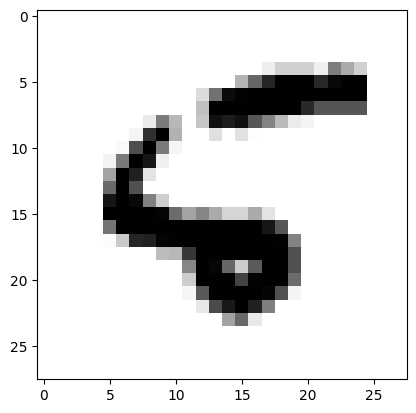

In [11]:
n = 8
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( "Распознанная цифра:", np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

**Поиск неверных результатов**

In [16]:
mask = pred != y_test
print(mask[:10])

x_false = x_test[mask]
p_false = pred[mask]

print(x_false.shape)

[False False False False False False False False  True False]
(263, 28, 28)


**Вывод неверных результатов**

Значение НС: 7


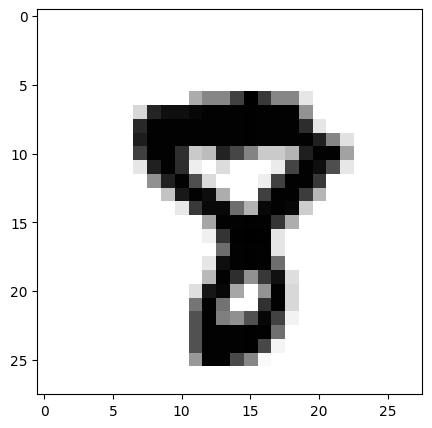

Значение НС: 2


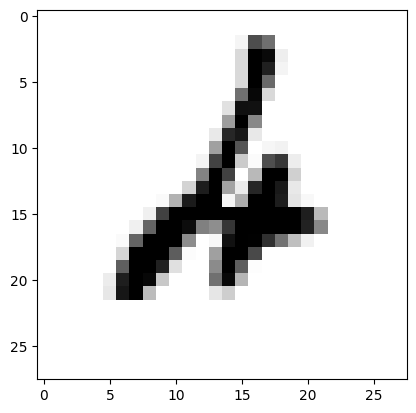

Значение НС: 0


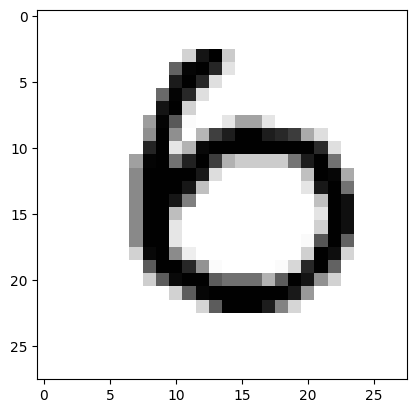

Значение НС: 5


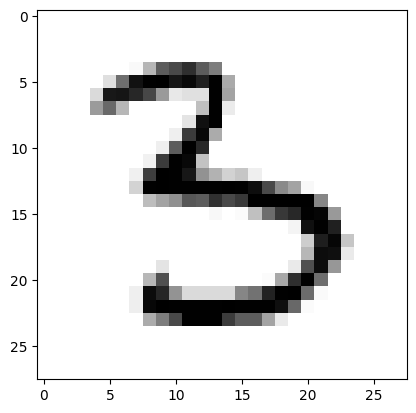

Значение НС: 7


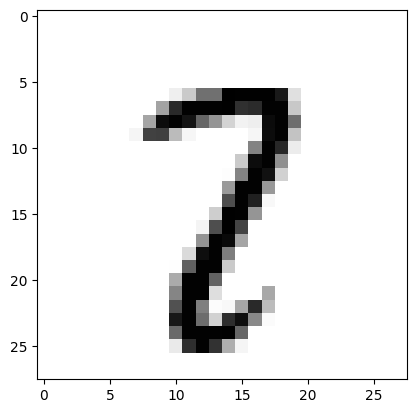

Значение НС: 3


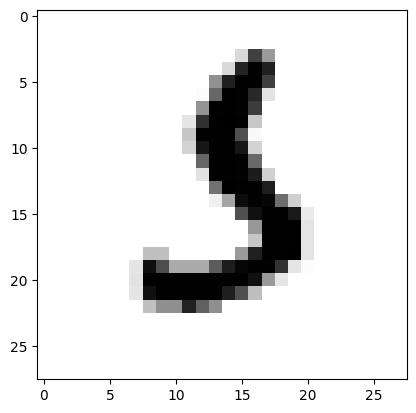

Значение НС: 0


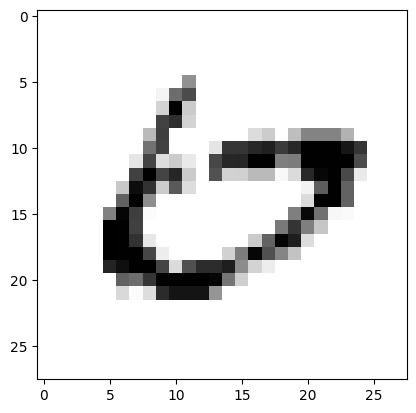

Значение НС: 9


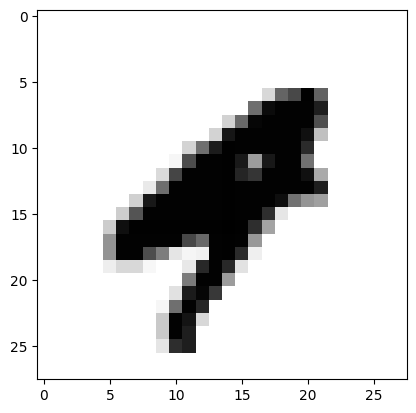

Значение НС: 5


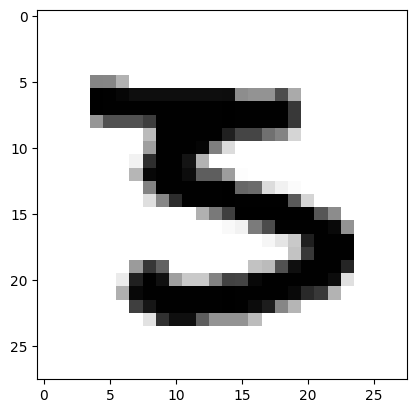

Значение НС: 7


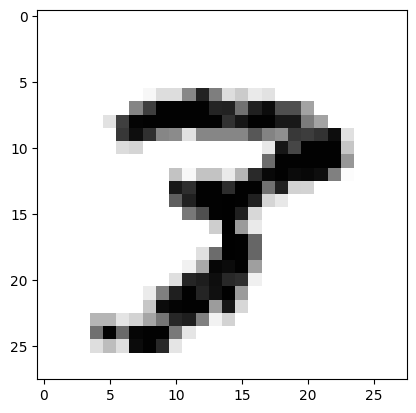

Значение НС: 2


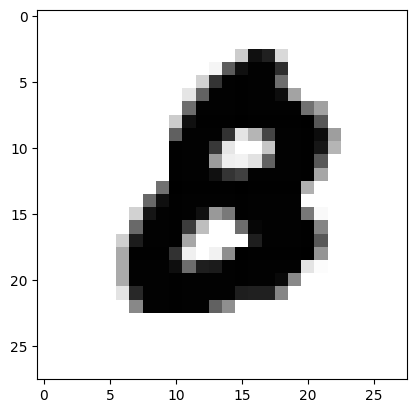

Значение НС: 1


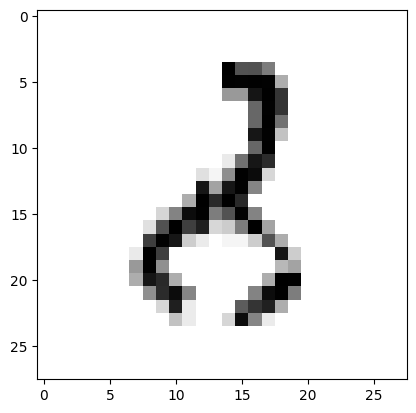

Значение НС: 7


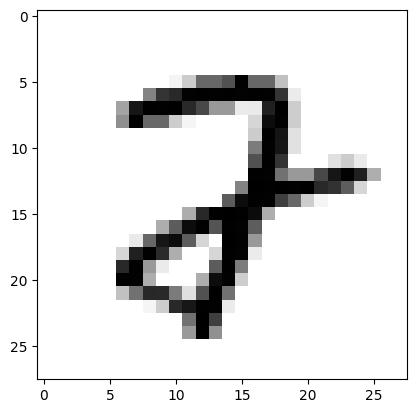

Значение НС: 8


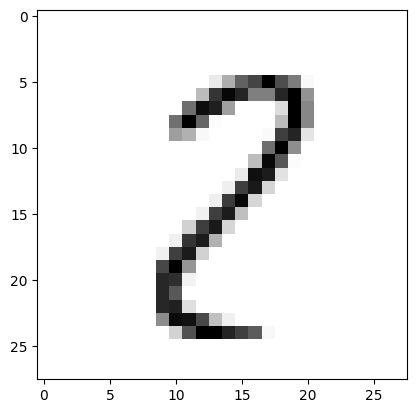

Значение НС: 3


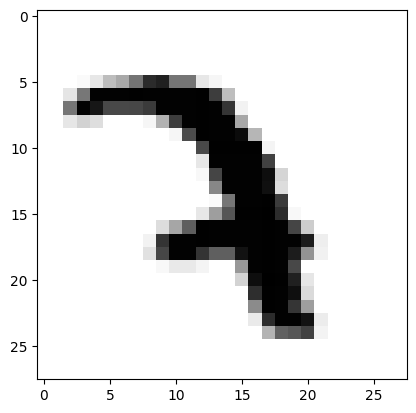

Значение НС: 4


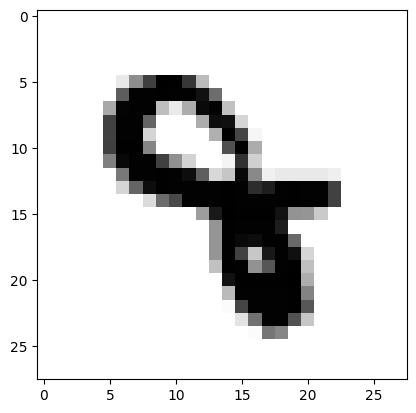

Значение НС: 9


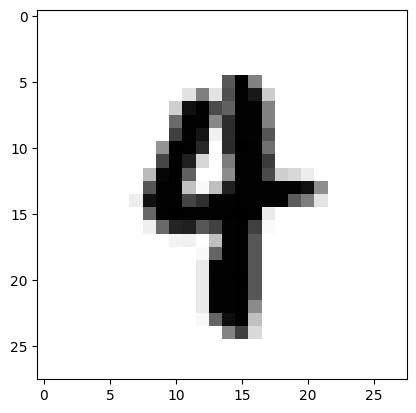

Значение НС: 8


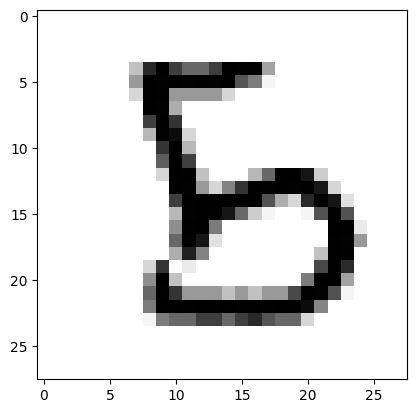

Значение НС: 9


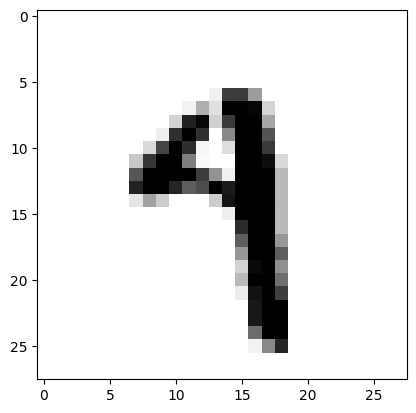

Значение НС: 9


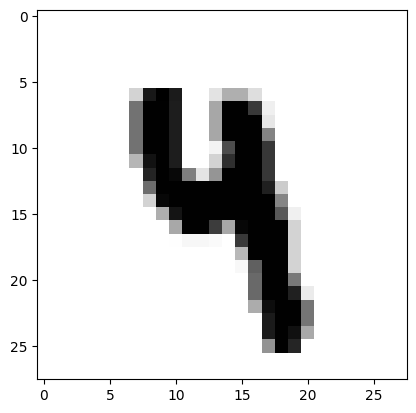

Значение НС: 7


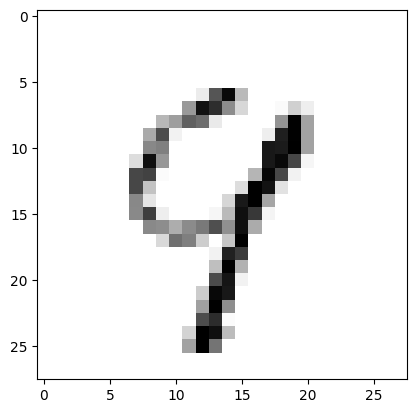

Значение НС: 5


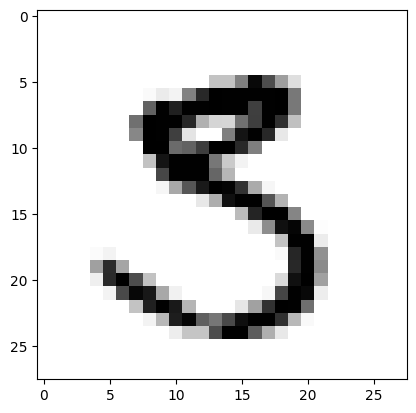

Значение НС: 9


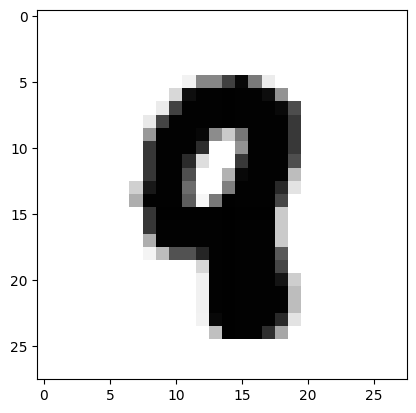

Значение НС: 4


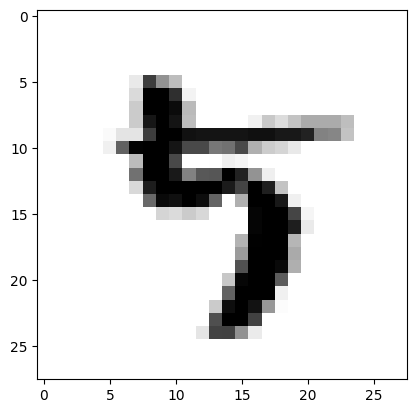

Значение НС: 2


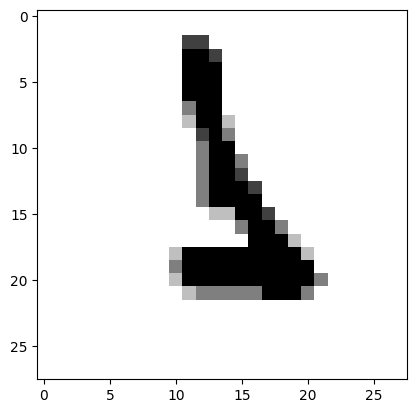

In [24]:
plt.figure(figsize=(10,5))
for i in range(25):
  print("Значение НС: " +str(p_false[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()